## Environment Setup
Lets know where is python installed and which version of python installed

In [ ]:
!which python
!python --version

/usr/local/bin/python
Python 3.10.11


Lets reset python path to avoid any issues in installing miniconda

In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


Trackpy strongly recommands to install it through conda not through pip, so lets install miniconda. Miniconda version should be installed according to python version installed.  

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


--2023-05-01 04:00:53--  https://repo.continuum.io/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh [following]
--2023-05-01 04:00:53--  https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘Miniconda3-py310_23.3.1-0-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 4.92M 14s
    50K .......... ..........

Make sure that python and conda paths are same

In [ ]:
!which conda

/usr/local/bin/conda


In [ ]:
!conda --version

conda 23.3.1


Lets update the Conda to its latest version

In [ ]:
%%bash
conda install --channel defaults conda python=3.10 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-3.10.11             |       h7a1cb2a_2        26.8 MB
    requests-2.29.0            |  py310h06a4308_0          97 KB
    setuptools-66.0.0          |  py310h06a4308_0         1.2 MB
    sqlite-3.41.2              |       h5eee18b_0         1.2 MB
    ------------------------------------------------------------
                                           Total:        29.2 MB

The following packages will be UPDATED:

  python                                 3.10.10-h7a1cb2a_2 --> 3.10.11-h7a1cb2a_2 
  requests                           2.28.1-py310h06a4308_1 --> 2.29.0-py310h06a4308_0 
  setuptools                         65.6.3-py310h06a4308_0 --> 66.0

In [ ]:
!conda --version
!python --version

conda 23.3.1
Python 3.10.11


In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
import sys
_ = (sys.path
.append("/usr/local/lib/python3.10/site-packages"))

Lets install 'trackpy' using conda

In [ ]:
!conda install -c conda-forge trackpy --all --yes
#!conda install -c conda-forge pims

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [ ]:
# !conda install -c conda-forge pims

Import matplotlib modules to ploting work

In [ ]:
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

Import trackpy and other necessory libiraries

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

# import pims
import cv2
import trackpy as tp

Following function 'imfill' converts a frame into binary image, it makes background black and particle white.


In [ ]:
def imfill(im_in,th,binary_img = True):

  thd, im_th = cv2.threshold(im_in, th, 255, cv2.THRESH_BINARY)

  # # Copy the thresholded image.
  # im_floodfill = im_th.copy()

  # # Mask used to flood filling.
  # # Notice the size needs to be 2 pixels than the image.
  # h, w = im_th.shape[:2]
  # mask = np.zeros((h+2, w+2), np.uint8)

  # # Floodfill from point (0, 0)
  # cv2.floodFill(im_floodfill, mask, (0,0), 255)

  # # Invert floodfilled image
  # im_floodfill_inv = cv2.bitwise_not(im_floodfill)

  # # Combine the two images to get the foreground.
  # im_out = im_th | im_floodfill_inv
  # # plt.imshow(im_out)

  return im_th

Below cell is for preparing first frame of the video

Text(0.5, 1.0, 'Binary Image after Erosion')

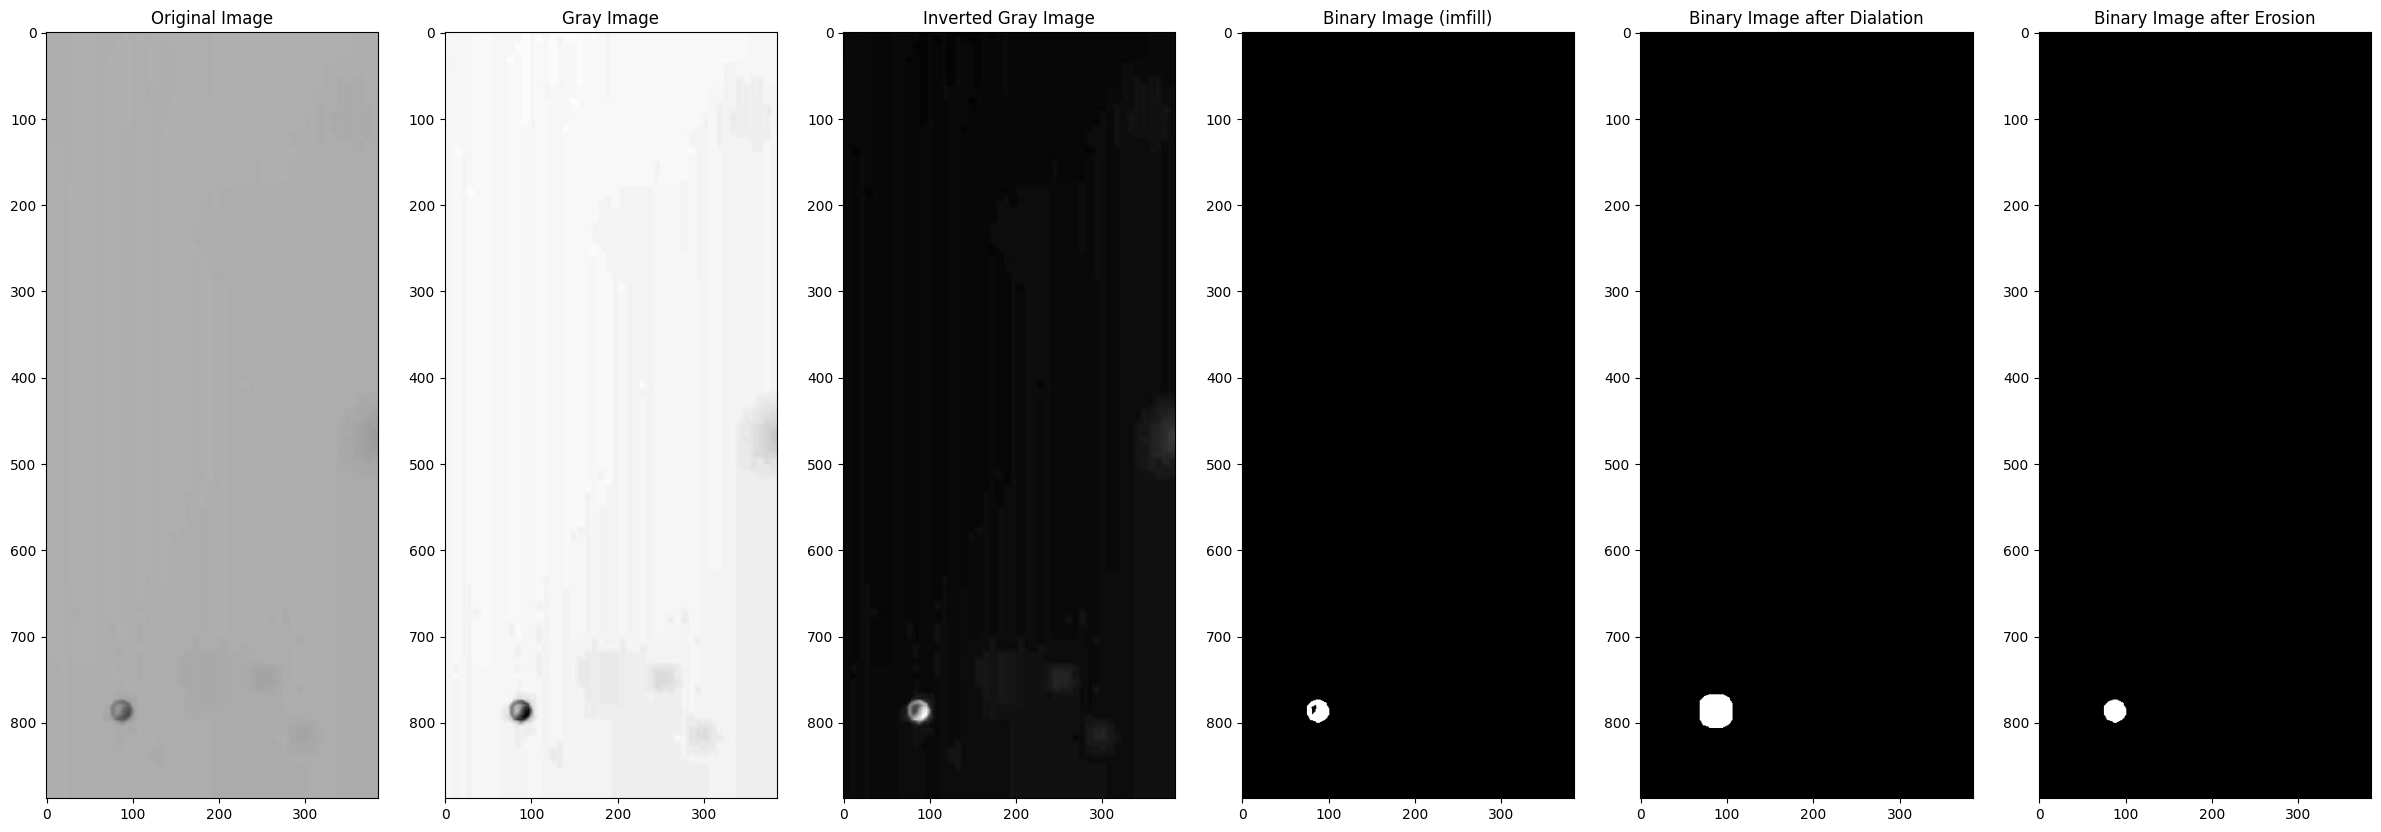

In [ ]:
# path to the video
path = "/content/drive/MyDrive/UGP/01_single_particle_trajectories/Water-23.avi"

fig = plt.figure()
rows = 1
columns = 6


# Make a video object
vidObj = cv2.VideoCapture(path)
# Read a frame i.e. first frame
success, image = vidObj.read()

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(30, 6))
mpl.rc('image', cmap='gray')

fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.title("Original Image")

# Convert it to gray
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
fig.add_subplot(rows, columns, 2)
plt.imshow(gray_img)
plt.title("Gray Image")

# Invert it
gray_img = cv2.bitwise_not(gray_img)
fig.add_subplot(rows, columns, 3)
plt.imshow(gray_img)
plt.title("Inverted Gray Image")

# Call imfill
th = 110
bin_img = imfill(gray_img,th)
fig.add_subplot(rows, columns, 4)
plt.imshow(bin_img)
plt.title("Binary Image (imfill)")

# Dilate
k1 = 5 # kernal size
itr1 = 3 # no. of iteration
kernel1 = np.ones((k1, k1), np.uint8)
bin_img = cv2.dilate(bin_img, kernel1, iterations=itr1)

fig.add_subplot(rows, columns, 5)
plt.imshow(bin_img,cmap='gray')
plt.title("Binary Image after Dialation")

# Erode
k2 = 5 # kernal size
itr2 = 3 # no. of iteration
kernel2 = np.ones((k2, k2), np.uint8)
bin_img = cv2.erode(bin_img, kernel2, iterations=itr2)

fig.add_subplot(rows, columns, 6)
plt.imshow(bin_img)
plt.title("Binary Image after Erosion")


Now this cell takes all frames from video and will process them according to above set parameters

In [ ]:
vidObj = cv2.VideoCapture(path)

# Used as counter variable
count = 0

# checks whether frames were extracted
success = 1
frames = []
while success:
  # vidObj object calls read
  # function extract frames
  success, image = vidObj.read()
  if success==0:
    break

  if count%20==0:
    # Convert it to gray
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    # Invert it
    gray_img = cv2.bitwise_not(gray_img)

    bin_img = imfill(gray_img,th)
    bin_img = cv2.dilate(bin_img, kernel1, iterations=itr1)
    bin_img = cv2.erode(bin_img, kernel2, iterations=itr2)
    frames.append(bin_img)

  count += 1

In [ ]:
total_frames = len(frames)
total_frames

151

In [ ]:
np.shape(frames[0])

(888, 385)

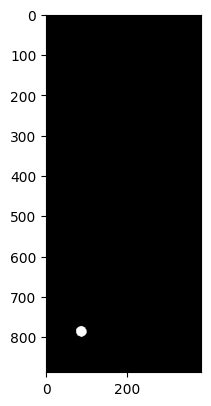

In [ ]:
mpl.rc('figure',  figsize=(2, 5))
plt.imshow(frames[0])

Now using trackpy track particles on first frame to see how it looks

In [ ]:
avg_dia = 25 #average diameter
f = tp.locate(frames[0], avg_dia)
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep
0,788.597661,85.456253,39382.54999,8.399382,0.093166,140.339444,102765.0,0.0


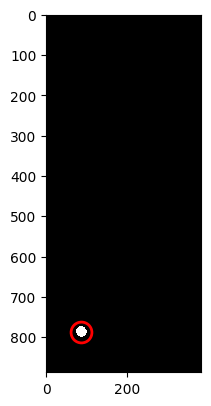

In [ ]:
tp.annotate(f, frames[0])
mpl.rc('figure',  figsize=(2, 5))

Locate particles on all frames and plot histogram of mass of particles

In [ ]:
f = tp.locate(frames, avg_dia, minmass = 35000)

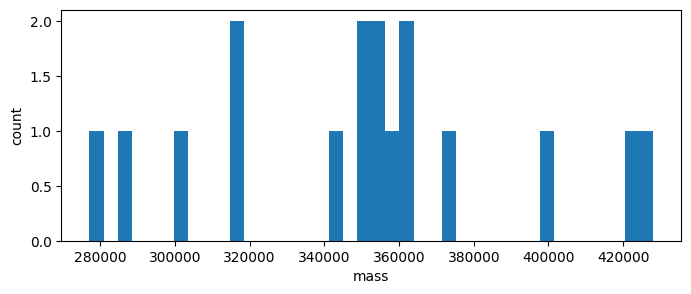

In [ ]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=40)

# label the axes.
ax.set(xlabel='mass', ylabel='count')
mpl.rc('figure',  figsize=(8, 3))

Now set a minmass value according to above plot and batch all frames using trackpy

In [ ]:
f = tp.batch(frames[:total_frames], avg_dia, minmass=35000)

Frame 150: 1 features


In [ ]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,788.597661,85.456253,39382.549990,8.399382,0.093166,140.339444,102765.0,0.0,0
1,780.263508,78.370209,39280.777861,8.401048,0.076925,139.838420,103275.0,0.0,1
2,781.517489,73.408524,38829.564746,8.343520,0.090650,140.612906,101745.0,0.0,2
3,774.311694,70.062650,39597.959201,8.459523,0.072112,136.320843,105060.0,0.0,3
4,772.455028,61.571391,37343.900465,8.256916,0.111319,138.614749,99450.0,0.0,4
...,...,...,...,...,...,...,...,...,...
146,58.412304,306.523102,36850.145352,8.260025,0.106187,138.800400,99705.0,0.0,146
147,58.693592,308.781191,39578.783734,8.465800,0.075513,139.073858,104550.0,0.0,147
148,52.665847,309.421512,38240.898170,8.301626,0.102270,139.399726,100725.0,0.0,148
149,45.271376,308.838212,38903.995034,8.436211,0.085387,137.211106,104295.0,0.0,149


Let's see how detected trajectories look like

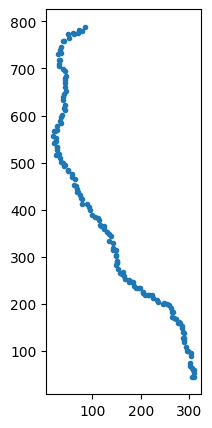

In [ ]:
plt.scatter(f['x'],f['y'],marker = '.')
mpl.rc('figure',  figsize=(2, 5))

Now link the all points of trajactory

In [ ]:
max_dist = 15 # Estimate of how many pixels away a particle can go in next frame
mem = 5 # Estimate of after how many frames a particle comes in video frame if it goes out in a previous frame
t = tp.link(f, max_dist, memory=mem)
t.head()

Frame 150: 1 trajectories present.


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,788.597661,85.456253,39382.549990,8.399382,0.093166,140.339444,102765.0,0.0,0,0
1,780.263508,78.370209,39280.777861,8.401048,0.076925,139.838420,103275.0,0.0,1,0
2,781.517489,73.408524,38829.564746,8.343520,0.090650,140.612906,101745.0,0.0,2,0
3,774.311694,70.062650,39597.959201,8.459523,0.072112,136.320843,105060.0,0.0,3,0
4,772.455028,61.571391,37343.900465,8.256916,0.111319,138.614749,99450.0,0.0,4,0


Export the dataframe as a csv file

In [ ]:
t.to_csv('/content/drive/MyDrive/UGP/Week_3/Movie_432_all.csv')

Export individual trajectory data

In [ ]:
ct = 0

while True:
  df = t[t['particle'] == ct]
  if df.size == 0:
    break

  path = '/content/drive/MyDrive/UGP/Week_3/Movie_432_particle_'+str(100+ct)+'.csv'
  df.to_csv(path)
  ct = ct+1